In [1]:
import pandas as pd
import seaborn as sns
from glob import glob
import json

In [5]:
file_path_list = sorted(glob('/data/project/vllm/benchmarks/thoroughput_bench/*.json'))

result_dict_list = []
for file_path in file_path_list:
    print(file_path)
    df = pd.read_json(file_path, orient='index')

    result_dict = df.transpose().iloc[0].to_dict()
    
    # result_dict['median_ttft']= df['ttfts'].median()
    # result_dict['median_itl'] = df['itls'].apply(lambda x: sum(x)/len(x)).median()
    result_dict['model_name'] ='-'.join(file_path.split('/')[-1].split('-')).replace('.json', '')
    result_dict_list.append(result_dict)

/data/project/vllm/benchmarks/thoroughput_bench/EXAONE-3.0-7.8B-Instruct-fp8-tp1.json
/data/project/vllm/benchmarks/thoroughput_bench/EXAONE-3.0-7.8B-Instruct-fp8-tp2.json
/data/project/vllm/benchmarks/thoroughput_bench/EXAONE-3.0-7.8B-Instruct-tp1.json
/data/project/vllm/benchmarks/thoroughput_bench/EXAONE-3.0-7.8B-Instruct-tp2.json
/data/project/vllm/benchmarks/thoroughput_bench/Meta-Llama-3.1-8B-Instruct.json
/data/project/vllm/benchmarks/thoroughput_bench/Mistral-7B-Instruct-v0.3.json
/data/project/vllm/benchmarks/thoroughput_bench/Mistral-Nemo-Instruct-2407.json
/data/project/vllm/benchmarks/thoroughput_bench/Qwen1.5-1.8B.json
/data/project/vllm/benchmarks/thoroughput_bench/Qwen1.5-MoE-A2.7B-Chat.json
/data/project/vllm/benchmarks/thoroughput_bench/Qwen2-0.5B-Instruct.json
/data/project/vllm/benchmarks/thoroughput_bench/Qwen2-1.5B-Instruct.json
/data/project/vllm/benchmarks/thoroughput_bench/Qwen2-7B-Instruct.json
/data/project/vllm/benchmarks/thoroughput_bench/gemma-2-2b-it.json


In [6]:
pd.options.display.float_format = '{:.2f}'.format
result_df = pd.DataFrame(result_dict_list)
result_df

,elapsed_time,num_requests,total_num_tokens,requests_per_second,tokens_per_second,model_name
0,79.12,1000.00,457383.00,12.64,5780.89,EXAONE-3.0-7.8B-Instruct-fp8-tp1
1,70.15,1000.00,457383.00,14.26,6520.27,EXAONE-3.0-7.8B-Instruct-fp8-tp2
2,81.70,1000.00,393054.00,12.24,4810.99,EXAONE-3.0-7.8B-Instruct-tp1
3,72.11,1000.00,457383.00,13.87,6343.01,EXAONE-3.0-7.8B-Instruct-tp2
4,93.16,1000.00,429688.00,10.73,4612.37,Meta-Llama-3.1-8B-Instruct
5,171.79,1000.00,784308.00,5.82,4565.48,Mistral-7B-Instruct-v0.3
6,109.29,1000.00,395673.00,9.15,3620.29,Mistral-Nemo-Instruct-2407
7,73.00,1000.00,478087.00,13.70,6548.90,Qwen1.5-1.8B
8,103.81,1000.00,478087.00,9.63,4605.39,Qwen1.5-MoE-A2.7B-Chat
9,47.51,1000.00,478087.00,21.05,10062.32,Qwen2-0.5B-Instruct


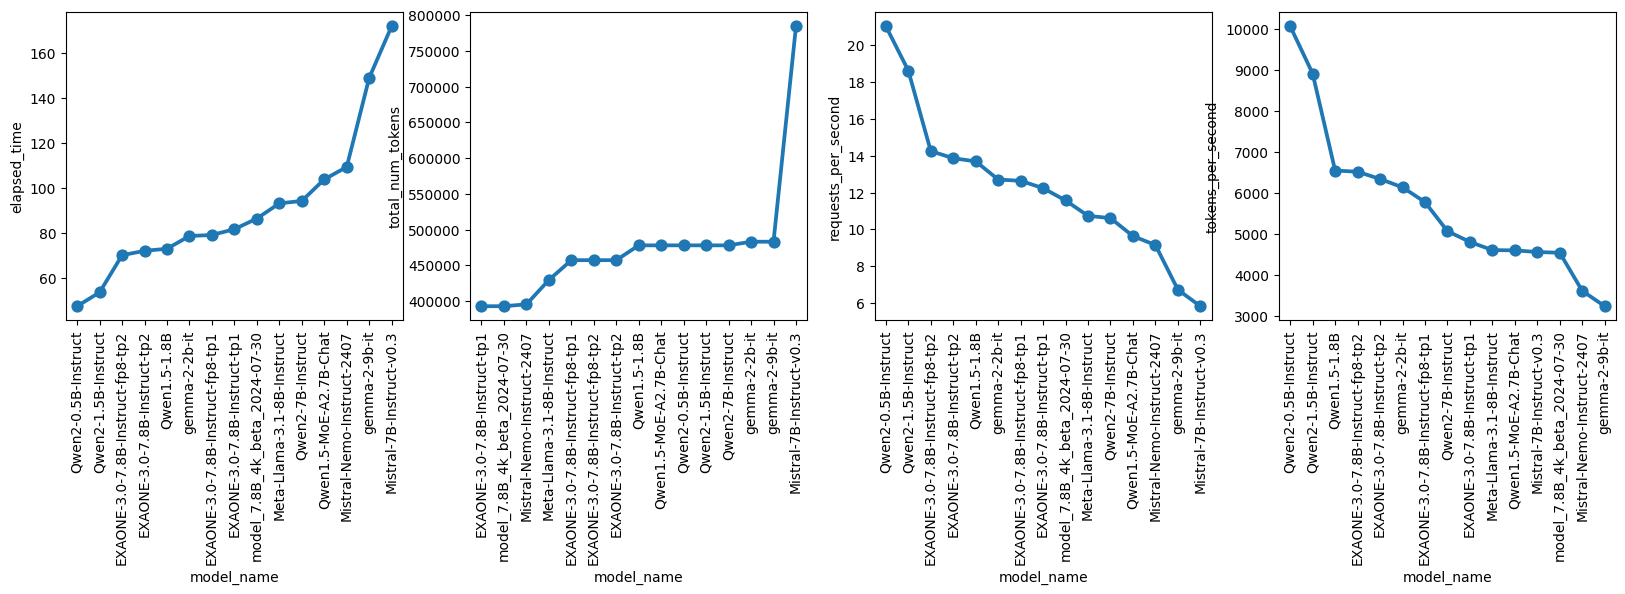

In [7]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
plt.subplot(1,4,1)
g = sns.pointplot(data=result_df.sort_values(by='elapsed_time'),  x='model_name', y='elapsed_time')
plt.xticks(rotation=90)


plt.subplot(1,4,2)
g = sns.pointplot(data=result_df.sort_values(by='total_num_tokens'),  x='model_name', y='total_num_tokens')
plt.xticks(rotation=90)


plt.subplot(1,4,3)
g = sns.pointplot(data=result_df.sort_values(by='requests_per_second', ascending=False),  x='model_name', y='requests_per_second')
plt.xticks(rotation=90)

plt.subplot(1,4,4)
g = sns.pointplot(data=result_df.sort_values(by='tokens_per_second', ascending=False),  x='model_name', y='tokens_per_second')
plt.xticks(rotation=90)

plt.show()